# Saturable Absorption Demo
In this notebook I will try to simulate the property called saturable absorption that is present in some materials like dyes and semiconductors. 

## What is Saturable Absorption?
Essentially, this is the property where the rate of absorption slows as the incident light becomes more intense. In other words, as the light entering the material becomes brighter, the amount of light that makes it through to the other side of the material per unit of light becomes less. So in short, you get diminishing returns.

## Importance
So why do we care about this property? Well, it turns out that this property introduces a nonlinearity - something that is vital to the operation of Multi-Layer Perceptron neural networks. This enables us to implement an activation function using light. Neat, right?

## Applications
Recently there has been some interest in photonic computing - basically computers that use light instead of electrons to do their computations. The benefits of photonic computing are appealing, it offers significant speedup and lowered power consumption over conventional computers. However, current applications of photonic seems to be rather limited, and the applications that I have seen so far have been very specific. 

One application that is of much interest to those who dabble in deep learning is the optical neural network (ONN). An ONN has been implemented using a nanophotonic prossesor by a group of researchers at MIT. The chip that they used is made up of a few key components: waveguides, phase shifters, and saturable absorbers. The first two are used to perform matrix multiplication and the saturable

## The Effect of Saturable Absorption
The effect of saturable absoption can be expressed as:
$$\sigma\tau_sI_0=\frac{1}{2}\frac{ln(\frac{T_m}{T_0})}{1-T_m}$$
where $\sigma$ is the absorption cross section per molecule, $\tau_s$ is the lifetime of molecules in the excited state, $I_0$ is the peak incident intensity, $T_m$ is the maximum transmittance, and $T_0$ is the initial transmittance.

This is also reffered to as the maximum transmitted intensity.

## Some Values
In order to simulate saturable absorption, I need two things: the mathematical model that describes it, and some values to plug into said model. If you have read this, then you will have noticed that we already have the model, so now it is just a matter of finding some suitable values.

The supplementary for the paper titled 'Deep learning with coherent nanophotonic circuits' provides us with some ballpark figures for the $\sigma$ and $\tau_s$ terms of the equation. Those values are:
$$\sigma\approx10^{-15} \:\text{(cm)}^2$$
$$\tau_s=10^{-9} \:\text{(sec)}$$

Some digging into the paper titled 'Monolayer Graphene as a Saturable Absorber in a Mode-Locked Laser' provides us with a few more values from their experiments (these are the best estimates I could manage with my current understanding):
$$T_0=-35.1 \:\text{dBm}$$
$$T_m=-2.64 \:\text{dBm}$$
Note that $T_0$ is roughly equivalent to 309 nW and $T_m$ is roughly equivalent to 0.55 mW.

These values were achieved using a femtosecond Ti:sapphire laser system with an incident intensity in the closed interval $[-30 \:\text{dBm}, -2.5 \:\text{dBm}]$.

With all these values, I think I have enough to reproduce the graph in the supplementary of 'Deep learning with coherent nanophotonic circuits' (Figure S3).

## The Code :)

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
sigma = 10e-15  # cm^2
tau_s = 10e-9  # seconds
T_0 = -35.1  # dBm
T_m = -2.64  # dBm
I = np.arange(-30, -2.5, 0.5)  # The range of incident intensities to test

In [3]:
from math import log

def transmitted_intensity(T_0, T_m):
    """Calculates the RHS of the maximum transmitted intensity:
    .. math:: \sigma\tau_sI_0=\frac{1}{2}\frac{ln(\frac{T_m}{T_0})}{1-T_m}
    
    Arguments:
        T_0: The initial transmittance.
        T_m: The maximum transmittance.
    
    Returns: the RHS of the maximum transmitted intensity equation, i.e. 
             1/2 * ln(T_m/T_0) / (1 - T_m)
    """
    return 1/2 * log(T_m/T_0) / (1 - T_m)

In [4]:
maximum_transmitted_intensity = transmitted_intensity(T_0, T_m)
print('Maximum transimitted intensity: {:.2f} (dBm)'.format(maximum_transmitted_intensity))

Maximum transimitted intensity: -0.36 (dBm)


In [5]:
def to_mw(dbm):
    """Convert a measurement made in dBm into mW.
    
    1 dBm (decibel milliwatt) is equivalent to 1 mW. As the name may 
    suggest dBm is a decibel scale and therefore is in a logarithmic
    scale. For example, 10 dBm is about 10 mW and -10 dBm is about 0.1 mW.
    
    Arguments:
        dbm: The measurement in dbm that is to be converted.
    Returns: The measurement converted into mW.
    """
    return 10 ** (dbm / 10.0)

In [6]:
data = np.array([sigma * tau_s * intensity for intensity in I])
data

array([-3.00e-21, -2.95e-21, -2.90e-21, -2.85e-21, -2.80e-21, -2.75e-21,
       -2.70e-21, -2.65e-21, -2.60e-21, -2.55e-21, -2.50e-21, -2.45e-21,
       -2.40e-21, -2.35e-21, -2.30e-21, -2.25e-21, -2.20e-21, -2.15e-21,
       -2.10e-21, -2.05e-21, -2.00e-21, -1.95e-21, -1.90e-21, -1.85e-21,
       -1.80e-21, -1.75e-21, -1.70e-21, -1.65e-21, -1.60e-21, -1.55e-21,
       -1.50e-21, -1.45e-21, -1.40e-21, -1.35e-21, -1.30e-21, -1.25e-21,
       -1.20e-21, -1.15e-21, -1.10e-21, -1.05e-21, -1.00e-21, -9.50e-22,
       -9.00e-22, -8.50e-22, -8.00e-22, -7.50e-22, -7.00e-22, -6.50e-22,
       -6.00e-22, -5.50e-22, -5.00e-22, -4.50e-22, -4.00e-22, -3.50e-22,
       -3.00e-22])

In [7]:
data_scaled = 1e22 * data
data_scaled

array([-30. , -29.5, -29. , -28.5, -28. , -27.5, -27. , -26.5, -26. ,
       -25.5, -25. , -24.5, -24. , -23.5, -23. , -22.5, -22. , -21.5,
       -21. , -20.5, -20. , -19.5, -19. , -18.5, -18. , -17.5, -17. ,
       -16.5, -16. , -15.5, -15. , -14.5, -14. , -13.5, -13. , -12.5,
       -12. , -11.5, -11. , -10.5, -10. ,  -9.5,  -9. ,  -8.5,  -8. ,
        -7.5,  -7. ,  -6.5,  -6. ,  -5.5,  -5. ,  -4.5,  -4. ,  -3.5,
        -3. ])

In [8]:
data_mw = np.array(list(map(lambda dbm: to_mw(dbm), data_scaled)))
data_mw

array([0.001     , 0.00112202, 0.00125893, 0.00141254, 0.00158489,
       0.00177828, 0.00199526, 0.00223872, 0.00251189, 0.00281838,
       0.00316228, 0.00354813, 0.00398107, 0.00446684, 0.00501187,
       0.00562341, 0.00630957, 0.00707946, 0.00794328, 0.00891251,
       0.01      , 0.01122018, 0.01258925, 0.01412538, 0.01584893,
       0.01778279, 0.01995262, 0.02238721, 0.02511886, 0.02818383,
       0.03162278, 0.03548134, 0.03981072, 0.04466836, 0.05011872,
       0.05623413, 0.06309573, 0.07079458, 0.07943282, 0.08912509,
       0.1       , 0.11220185, 0.12589254, 0.14125375, 0.15848932,
       0.17782794, 0.19952623, 0.22387211, 0.25118864, 0.28183829,
       0.31622777, 0.35481339, 0.39810717, 0.44668359, 0.50118723])

Text(0.5, 0, '$I_{in}\\sigma\\tau_s$')

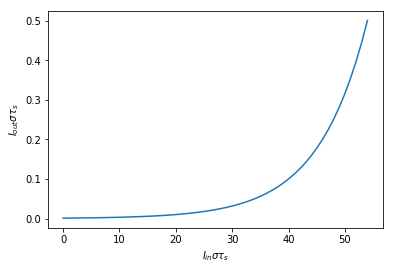

In [9]:
plt.plot(range(len(data_mw)), data_mw)
plt.ylabel('$I_{out}\sigma\\tau_s$')
plt.xlabel('$I_{in}\sigma\\tau_s$')

## Discussion of Initial Results
The graph produced is certainly nonlinear, however the scales seem out. Note that in the plot I am trying to reproduce has similar units on both axis. Additionally, that plot looks like softplus, whereas my plot just looks like exponential growth.

## Solving for $T_m$
The supplementary for the paper titled 'Deep learning with coherent nanophotonic circuits' states that:
>  Given \[an\] input intensity $I_0$, one can solve for $T_m(I_0)$ from  Eqn.  18,  and  the  output  intensity  can  be  calculated  as $I_{out}=I_0 \cdot T_m(I_0)$. 

where Eqn. 18 refers to the equation given in the above section titled '[The Effect of Saturable Absorption](#The-Effect-of-Saturable-Absorption)'.

According to wolfram alpha the resulting equation is as follows:
$$T_m = \frac{W(2 e^{2 x σ τ} x σ τ T_0)}{2 σ τ x}$$
where $W(x)$ is the Lambert _W_ function.

In [10]:
from scipy.special import lambertw

def t_m(i_in, k=0):
    """Calculate T_m (maximum transmitted intensity) based on the 
    expression for saturable absorption rearranged to solve for 
    T_m
    
    Arguments:
        i_in: The incident intensity.
        k: The branch index for the Lambert W function
        
    Returns: T_m, the maximum transmitted intensity in mW.
    """
    return (1/2) * lambertw(2 * np.exp(2 * i_in * sigma * tau_s) * i_in * sigma * tau_s * T_0, k=k) / (sigma * tau_s * i_in)

In [11]:
intensity = to_mw(-30)
intensity * t_m(intensity)

(-0.03509999999999999+0j)

In [12]:
data_that_should_be_right = np.array([to_mw(i_in) * t_m(to_mw(i_in)) for i_in in I])
data_that_should_be_right = data_that_should_be_right.real # the imaginary parts are all zero anyway
data_that_should_be_right

array([ -0.0351    ,  -0.03938285,  -0.04418828,  -0.04958007,
        -0.05562975,  -0.06241761,  -0.07003371,  -0.07857911,
        -0.08816721,  -0.09892524,  -0.11099595,  -0.1245395 ,
        -0.13973562,  -0.15678594,  -0.17591672,  -0.19738181,
        -0.22146603,  -0.24848897,  -0.27880921,  -0.31282908,
        -0.351     ,  -0.39382848,  -0.44188282,  -0.49580068,
        -0.55629751,  -0.62417607,  -0.70033707,  -0.78579112,
        -0.88167214,  -0.98925241,  -1.10995946,  -1.245395  ,
        -1.39735617,  -1.56785941,  -1.75916719,  -1.97381805,
        -2.21466028,  -2.4848897 ,  -2.7880921 ,  -3.12829079,
        -3.51      ,  -3.93828477,  -4.4188282 ,  -4.95800678,
        -5.56297511,  -6.24176073,  -7.00337073,  -7.8579112 ,
        -8.81672137,  -9.89252409, -11.09959459, -12.45394996,
       -13.97356169, -15.67859408, -17.5916719 ])

Text(0.5, 0, '$I_{in}\\sigma\\tau_s$')

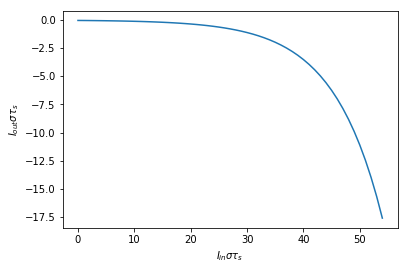

In [13]:
plt.plot(data_that_should_be_right)
plt.ylabel('$I_{out}\sigma\\tau_s$')
plt.xlabel('$I_{in}\sigma\\tau_s$')

## Discussion of Further Results
Now it's an upside down exponential :( I think the x axis data is wrong.

In [14]:
x_axis_data = [to_mw(i_in) * sigma * tau_s for i_in in I]
x_axis_data

[1e-25,
 1.1220184543019631e-25,
 1.2589254117941676e-25,
 1.4125375446227538e-25,
 1.5848931924611142e-25,
 1.778279410038923e-25,
 1.995262314968879e-25,
 2.23872113856834e-25,
 2.5118864315095796e-25,
 2.818382931264455e-25,
 3.1622776601683796e-25,
 3.548133892335753e-25,
 3.9810717055349735e-25,
 4.466835921509631e-25,
 5.011872336272725e-25,
 5.62341325190349e-25,
 6.309573444801931e-25,
 7.07945784384138e-25,
 7.943282347242814e-25,
 8.912509381337459e-25,
 1e-24,
 1.1220184543019636e-24,
 1.2589254117941674e-24,
 1.412537544622754e-24,
 1.5848931924611134e-24,
 1.778279410038923e-24,
 1.99526231496888e-24,
 2.23872113856834e-24,
 2.5118864315095795e-24,
 2.8183829312644536e-24,
 3.1622776601683795e-24,
 3.548133892335755e-24,
 3.981071705534974e-24,
 4.46683592150963e-24,
 5.011872336272723e-24,
 5.623413251903491e-24,
 6.309573444801933e-24,
 7.07945784384138e-24,
 7.943282347242814e-24,
 8.912509381337455e-24,
 1.0000000000000001e-23,
 1.1220184543019636e-23,
 1.2589254117941

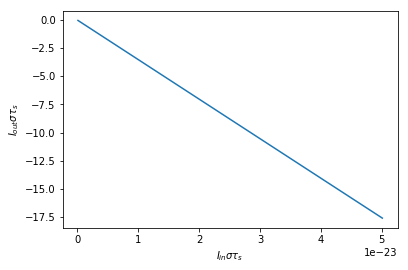

In [15]:
plt.plot(x_axis_data, data_that_should_be_right)
plt.ylabel('$I_{out}\sigma\\tau_s$')
plt.xlabel('$I_{in}\sigma\\tau_s$')
plt.show()

Now it's linear :(

The Lambert _W_ function is a multivalued function, so let's try a different branch.

In [16]:
data_that_might_be_right = np.array([to_mw(i_in) * t_m(to_mw(i_in), k=1) for i_in in I])
data_that_might_be_right

array([-2.86844777e+23+3.19709220e+22j, -2.86259038e+23+3.19720681e+22j,
       -2.85673279e+23+3.19732189e+22j, -2.85087499e+23+3.19743745e+22j,
       -2.84501698e+23+3.19755350e+22j, -2.83915877e+23+3.19767003e+22j,
       -2.83330035e+23+3.19778704e+22j, -2.82744172e+23+3.19790455e+22j,
       -2.82158288e+23+3.19802256e+22j, -2.81572382e+23+3.19814106e+22j,
       -2.80986456e+23+3.19826006e+22j, -2.80400508e+23+3.19837956e+22j,
       -2.79814539e+23+3.19849958e+22j, -2.79228549e+23+3.19862010e+22j,
       -2.78642537e+23+3.19874114e+22j, -2.78056504e+23+3.19886269e+22j,
       -2.77470448e+23+3.19898477e+22j, -2.76884371e+23+3.19910737e+22j,
       -2.76298273e+23+3.19923049e+22j, -2.75712152e+23+3.19935415e+22j,
       -2.75126009e+23+3.19947834e+22j, -2.74539844e+23+3.19960306e+22j,
       -2.73953656e+23+3.19972833e+22j, -2.73367447e+23+3.19985414e+22j,
       -2.72781214e+23+3.19998050e+22j, -2.72194960e+23+3.20010741e+22j,
       -2.71608682e+23+3.20023488e+22j, -2.71022382

<IPython.core.display.Javascript object>


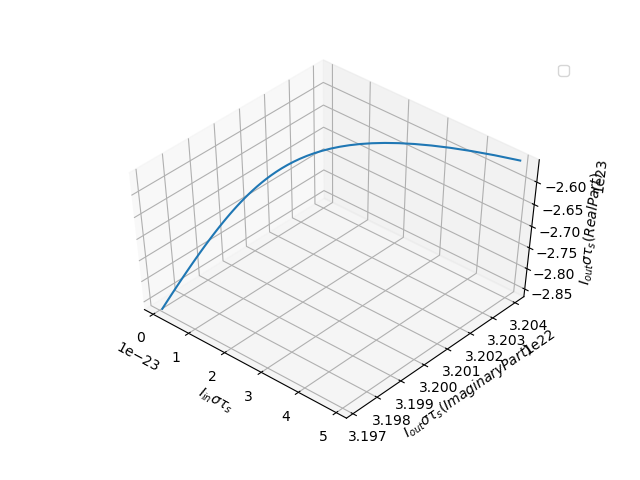

No handles with labels found to put in legend.


In [17]:
from mpl_toolkits.mplot3d import Axes3D
%matplotlib notebook

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot(x_axis_data, data_that_might_be_right.imag, data_that_might_be_right.real)
ax.set_xlabel('$I_{in}\sigma\\tau_s$')
ax.set_ylabel('$I_{out}\sigma\\tau_s (Imaginary Part)$')
ax.set_zlabel('$I_{out}\sigma\\tau_s (Real Part)$')
ax.legend()

plt.show()

Using the first branch gives us a something akin to logarithmic growth in both the real and imaginary dimensions. However, this still doesn't look like the plot I am trying to reproduce.